# SHO Fitting Data

## Import Packages

In [1]:
import sys
sys.path.append('../../')
sys.path.append('/home/ferroelectric/m3_learning/m3_learning/src')

In [3]:
%load_ext autoreload
# import gdown
import time
import h5py
import pyUSID as usid
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import style
from m3_learning.be.util import print_be_tree
from m3_learning.be.processing import convert_amp_phase, fit_loop_function, SHO_Fitter, SHO_fit_to_array, loop_lsqf
from m3_learning.viz.layout import layout_fig
from m3_learning.util.h5_util import make_dataset, make_group
from m3_learning.util.file_IO import download_and_unzip
from m3_learning.viz.printing import printer
from m3_learning.be.dataset import BE_Dataset
printing = printer(basepath = './figures/')

from scipy.signal import resample
from scipy import fftpack


style("default")
random_seed(seed=42)

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
default set for matplotlib
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loading data for SHO fitting


In [4]:
path = r"./"

In [5]:
# Download the data file from Zenodo
url = 'https://zenodo.org/record/7774788/files/PZT_2080_raw_data.h5?download=1'

# Specify the filename and the path to save the file
filename = 'data_file_raw_fitted.h5'
save_path = './'

# download the file
download_and_unzip(filename, url, save_path)

Using files already downloaded


Prints the Tree to show the Data Structure

In [ ]:
# dataset.delete("/Measurement_000/Channel_000/magnitude_spectrum_resampled")

# dataset.delete("/Measurement_000/Channel_000/raw_data_resampled")


In [6]:
# instantiate the dataset object
dataset = BE_Dataset("./data_file_raw.h5", testing=True)

# print the contents of the file
dataset.print_be_tree()

# sets size for resampling
dataset.resample_bins = 80

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
    ├ complex
      -------
      ├ imag
      ├ imag_resampled
      ├ real
      ├ real_resampled
    ├ magnitude_spectrum
      ------------------
      ├ amplitude
      ├ phase
   

## SHO Fitting
**Note**: this code takes around 15 minutes to execute

In [ ]:
# computes the SHO fit for the data in the file
# dataset.SHO_Fitter(force = True)

### Visualize Raw Data

1294 106


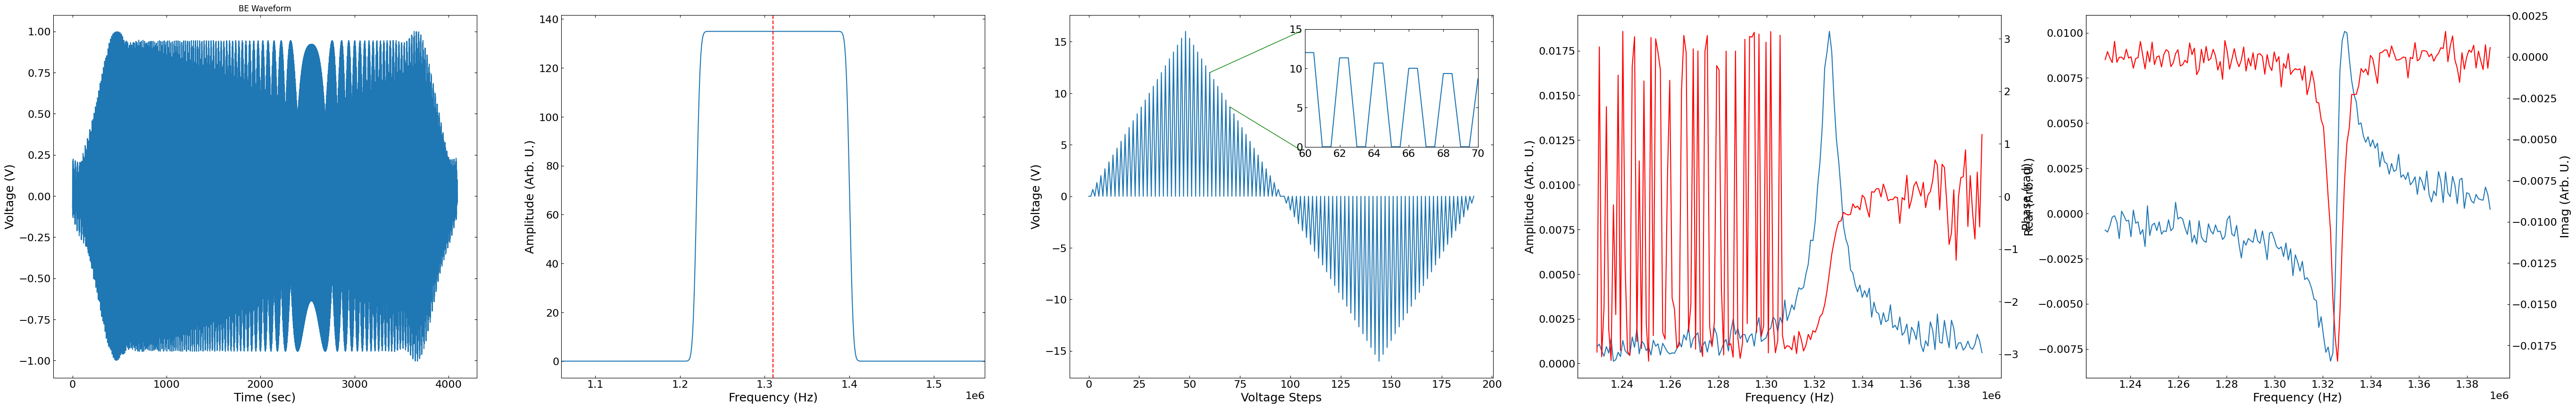

In [8]:
dataset.lsqf_viz.raw_be()

### Plots the SHO Fit Results

In [ ]:
dataset.lsqf_viz.SHO_loops()

### Visualize the SHO Fit Results

In [ ]:
dataset.lsqf_viz.shift = np.pi/2
dataset.lsqf_viz.SHO_hist()


## Preprocessing

### Validate Resampling

In [ ]:
dataset.lsqf_viz.raw_resampled_data(filename="Figure_4_raw_and_resampled_raw_data")


In [ ]:
with dataset.dataset